In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read exp_kriging_output.csv
doe = pd.read_csv("exp_kriging_input.csv", index_col=0)
results = pd.read_csv("exp_kriging_output.csv", index_col=0)

In [3]:
# merge doe and results
doe_results = pd.merge(doe, results, left_index=True, right_index=True)

In [4]:
doe_results

,num_sample,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,2,Forrester_1a,1,finished,34.217127,10.216207,-0.000904,0.044988
1,4,Forrester_1a,1,finished,45.295677,12.924626,-0.601950,0.060591
2,6,Forrester_1a,1,finished,11.018747,4.028278,0.844385,0.103482
3,8,Forrester_1a,1,finished,32.970056,6.957690,0.535759,0.119107
4,10,Forrester_1a,1,finished,3.575077,0.505519,0.997549,0.160078
...,...,...,...,...,...,...,...,...
1095,32,mf_Sixhump,5,finished,0.028878,0.005358,0.999985,3.939472
1096,34,mf_Sixhump,5,finished,0.107038,0.012852,0.999914,4.026655
1097,36,mf_Sixhump,5,finished,0.017557,0.003122,0.999995,3.705638
1098,38,mf_Sixhump,5,finished,0.098814,0.010096,0.999947,4.031094


In [5]:
doe_results["problem"].values

array(['Forrester_1a', 'Forrester_1a', 'Forrester_1a', ..., 'mf_Sixhump',
       'mf_Sixhump', 'mf_Sixhump'], dtype=object)

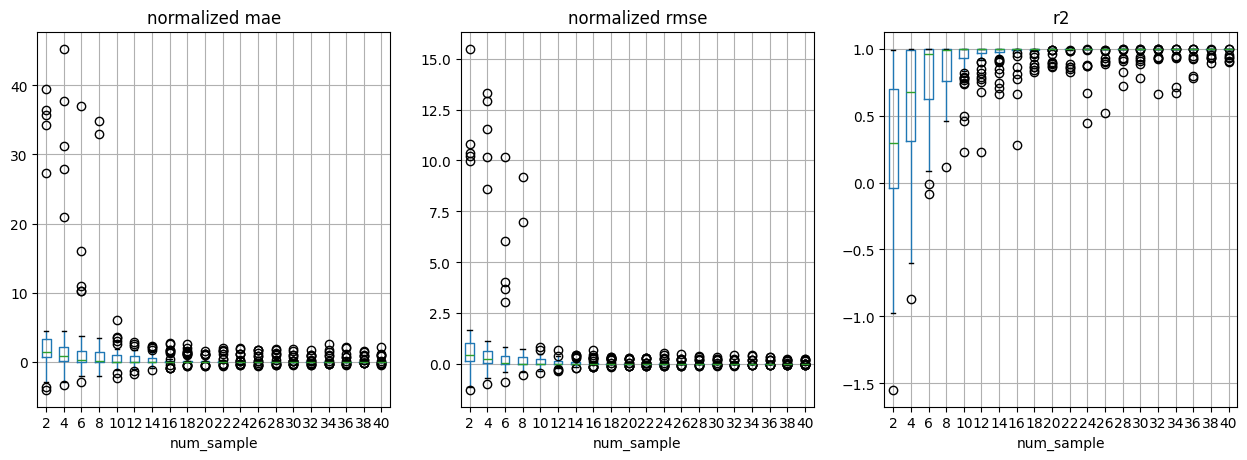

In [6]:
# get function name from problem column
# get a sub-dataframe with only specific problem
doe_results_1b = doe_results[doe_results["problem"] == "mf_Sixhump"]


# plot boxplot regarding mae, mse r2 with respect to different number of samples on  Forrester 1b function
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results.boxplot(column=["normalized_mae"], by="num_sample", ax=ax[0])
doe_results.boxplot(column=["normalized_rmse"], by="num_sample", ax=ax[1])
doe_results.boxplot(column=["r2"], by="num_sample", ax=ax[2])
ax[0].set_title("normalized mae")
ax[1].set_title("normalized rmse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()

In [9]:
# results of num_sample = 10
doe_results_1b[doe_results_1b["num_sample"] == 18]

,num_sample,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
1008,18,mf_Sixhump,1,finished,1.319648,0.265698,0.964797,1.605023
1028,18,mf_Sixhump,2,finished,1.174651,0.193990,0.980620,1.529452
1048,18,mf_Sixhump,3,finished,1.636189,0.339351,0.938836,1.721667
1068,18,mf_Sixhump,4,finished,2.051222,0.287339,0.957523,1.866736
1088,18,mf_Sixhump,5,finished,0.176905,0.066481,0.997690,1.714933


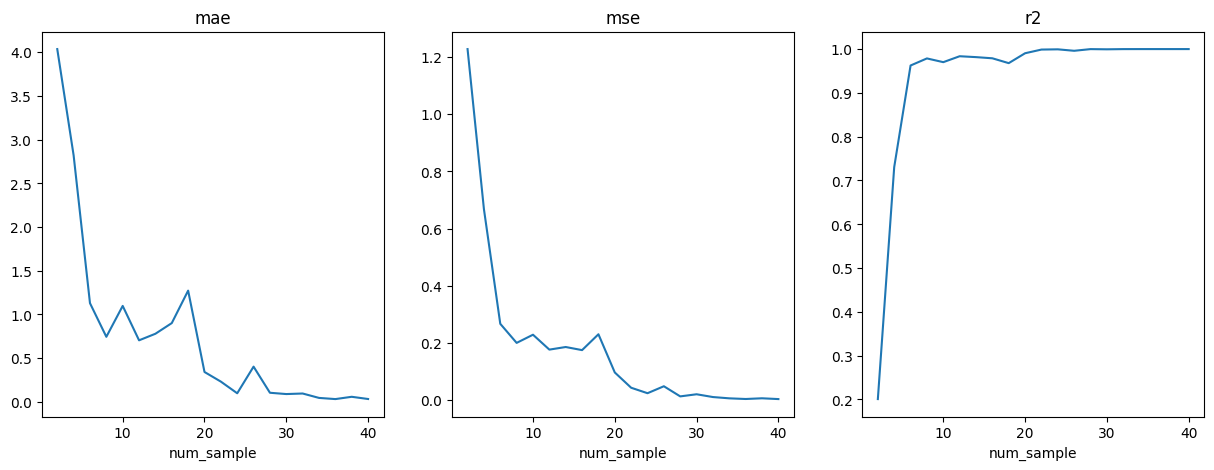

In [8]:
# plot median value regarding mae, mse r2 with respect to different number of samples
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results_1b.groupby(["num_sample"])["normalized_mae"].mean().plot(ax=ax[0])
doe_results_1b.groupby(["num_sample"])["normalized_rmse"].mean().plot(ax=ax[1])
doe_results_1b.groupby(["num_sample"])["r2"].mean().plot(ax=ax[2])
ax[0].set_title("mae")
ax[1].set_title("mse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()

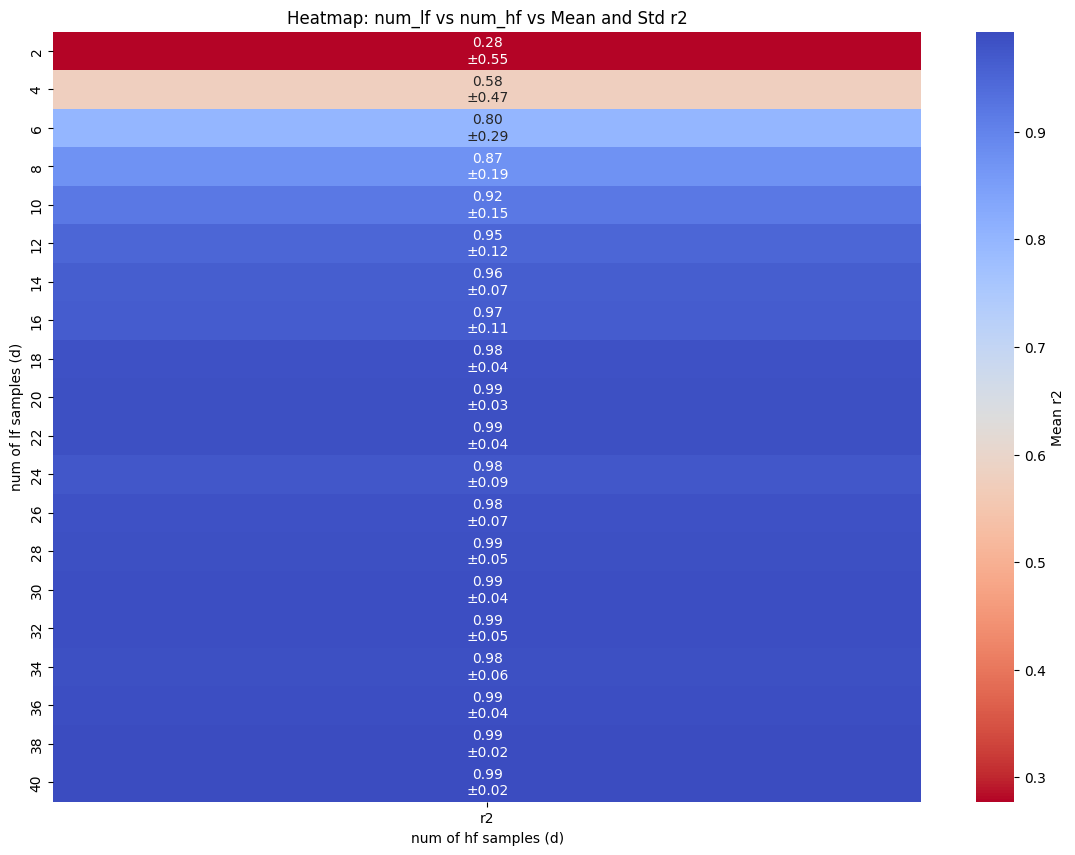

In [14]:
# heat map of r2 with respect to different number of samples
import seaborn as sns

pivot_table = doe_results.pivot_table(
    values="r2", index="num_sample",  aggfunc=["mean", "std"]
)
# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("Heatmap: num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()